## Chapter 4 | introduction to neural learning : gradient descent

In [1]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8
pred = input * knob_weight
error = (pred - goal_pred) ** 2 # Forces the raw error to be positive by multiplying 
                                #it by itself. Negative error wouldn't make sense.
print(error)

0.30250000000000005


The error is a way to measure how much you missed.  
This one is mean squared error

### Hot and cold learning

In [2]:
weight = 0.1
lr = 0.01
def neural_network(input, weight):
    prediction = input * weight 
    return prediction

In [3]:
# PREDICT: Making a prediction and evaluating error

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)

input = number_of_toes[0]
true = win_or_lose_binary[0]

pred = neural_network(input, weight)

error = (pred - true) ** 2
print(error)

0.022499999999999975


In [4]:
# COMPARE: Making a prediction with a higher weight and evaluating error
# We want to move the weight so the error goes downward. Let’s try moving the weight up and down using
# weight+lr and weight-lr, to see which one has the lowest error.

lr = 0.1
p_up = neural_network(input, weight+lr)
e_up = (p_up - true) ** 2
e_up

0.49000000000000027

In [5]:
# COMPARE: Making a prediction with a lower weight and evaluating erro

lr = 0.1
p_dn = neural_network(input, weight-lr)
e_dn = (p_dn - true) ** 2
e_dn

1.0

In [6]:
# COMPARE + LEARN: Comparing the errors and setting the new weight
# if(error > e_dn || error > e_up):
#     if(e_dn < e_up):
#         weight -= lr
#     if(e_up < e_up):
#         weight += lr

In [7]:
weight = 0.5
input = 0.5
goal_prediction = 0.8
step_amount = 0.001

def iterate(
    weight = weight, 
    input = input, 
    goal_prediction = goal_prediction, 
    step_amount = step_amount
):
    for iterations in range(1105):
        prediction = input*weight
        error = (prediction - goal_prediction) ** 2

        print("Error: "+str(error)+" Prediction: "+str(prediction))

        up_prediction = input * (weight + step_amount)
        up_error = (goal_prediction - up_prediction) ** 2

        down_prediction = input * (weight - step_amount)
        down_error = (goal_prediction - down_prediction) ** 2

        if (down_error < up_error):
            weight -= step_amount
        if (down_error > up_error):
            weight += step_amount

iterate()

Error: 0.30250000000000005 Prediction: 0.25
Error: 0.3019502500000001 Prediction: 0.2505
Error: 0.30140100000000003 Prediction: 0.251
Error: 0.30085225 Prediction: 0.2515
Error: 0.30030400000000007 Prediction: 0.252
Error: 0.2997562500000001 Prediction: 0.2525
Error: 0.29920900000000006 Prediction: 0.253
Error: 0.29866224999999996 Prediction: 0.2535
Error: 0.29811600000000005 Prediction: 0.254
Error: 0.2975702500000001 Prediction: 0.2545
Error: 0.29702500000000004 Prediction: 0.255
Error: 0.29648025 Prediction: 0.2555
Error: 0.29593600000000003 Prediction: 0.256
Error: 0.2953922500000001 Prediction: 0.2565
Error: 0.294849 Prediction: 0.257
Error: 0.29430625 Prediction: 0.2575
Error: 0.293764 Prediction: 0.258
Error: 0.2932222500000001 Prediction: 0.2585
Error: 0.292681 Prediction: 0.259
Error: 0.29214025 Prediction: 0.2595
Error: 0.2916 Prediction: 0.26
Error: 0.2910602500000001 Prediction: 0.2605
Error: 0.29052100000000003 Prediction: 0.261
Error: 0.28998225 Prediction: 0.2615
Error: 

In [8]:
# problem 1 - inefficient : predict multiple times to make a single knob_weight update

# problem 2 - impossible to predict the exact goal prediction.
# start alternating back and forth between each side of goal_prediction
# know the correct direction to move weight, don’t know the correct amount.

In [9]:
iterate(step_amount=0.2)

Error: 0.30250000000000005 Prediction: 0.25
Error: 0.20250000000000007 Prediction: 0.35
Error: 0.12250000000000007 Prediction: 0.44999999999999996
Error: 0.06250000000000006 Prediction: 0.5499999999999999
Error: 0.02250000000000004 Prediction: 0.6499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.00250000

Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction:

Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0025000000000000157 Prediction: 0.7499999999999999
Error: 0.0024999999999999823 Prediction:

In [10]:
iterate(step_amount=10)

Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25

Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25
Error: 0.30250000000000005 Prediction: 0.25
Error: 19.802500000000002 Prediction: 5.25


### Calculating both direction and amount from error: Gradient descent

In [11]:
weight = 0.5
goal_pred = 0.8
input = 0.5

for iterations in range(30):
    pred = input*weight
    error = (pred - goal_pred) ** 2
                           #pure error         # performs scaling, negative reversal and stopping
    direction_and_amount = (pred - goal_pred) * input
    weight -= direction_and_amount
    print("Error: " + str(error) + " Prediction: " + str(pred))

    # calculate both the direction and the amount to change weight to reduce error.
    
# The pure error is (pred - goal_pred), which indicates the raw direction and amount you missed.

Error: 0.30250000000000005 Prediction: 0.25
Error: 0.17015625000000004 Prediction: 0.3875
Error: 0.095712890625 Prediction: 0.49062500000000003
Error: 0.05383850097656251 Prediction: 0.56796875
Error: 0.03028415679931642 Prediction: 0.6259765625
Error: 0.0170348381996155 Prediction: 0.669482421875
Error: 0.00958209648728372 Prediction: 0.70211181640625
Error: 0.005389929274097089 Prediction: 0.7265838623046875
Error: 0.0030318352166796153 Prediction: 0.7449378967285156
Error: 0.0017054073093822882 Prediction: 0.7587034225463867
Error: 0.0009592916115275371 Prediction: 0.76902756690979
Error: 0.0005396015314842384 Prediction: 0.7767706751823426
Error: 0.000303525861459885 Prediction: 0.7825780063867569
Error: 0.00017073329707118678 Prediction: 0.7869335047900676
Error: 9.603747960254256e-05 Prediction: 0.7902001285925507
Error: 5.402108227642978e-05 Prediction: 0.7926500964444131
Error: 3.038685878049206e-05 Prediction: 0.7944875723333098
Error: 1.7092608064027242e-05 Prediction: 0.7958

### One iteration of gradient descent
performs a weight update on a single training example (input->true) pair.

In [12]:
weight = 0.1
alpha = 0.01

def neural_network(input, weight):
    prediction = input*weight
    return prediction

In [13]:
# Predict: making a prediction and evaluating the error

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)

input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]

pred = neural_network(input, weight)
        # row error
error = (pred - goal_pred) ** 2 # to make it positive error

In [14]:
# Compare: Calculating the node delta and putting it on the output node

delta = pred - goal_pred

In [15]:
# delta is a measurement of how much this node missed. The true prediction is 1.0, and the
# network’s prediction was 0.85, so the network was too low by 0.15. Thus, delta is negative 0.15.

delta

-0.1499999999999999

In [16]:
# First calculate how much you want the output node to be
# different. Only then do you compute direction_and_amount to change weight
# LEARN: Calculating the weight delta and putting it on the weight

weight_delta = input * delta

In [17]:
# weight_delta is a measure of how much a weight caused the network to miss.
weight_delta

-1.2749999999999992

In [18]:
# LEARN: Updating the weight
# multiply weight_delta by a small number alpha before using it to update weight
# control how fast the network learns
# If it learns too fast, it can update weights too aggressively and overshoot.
weight -= weight_delta * alpha

weight

0.11275

In [19]:
weight, goal_pred, input = (0.0, 0.8, 0.5)
for iteration in range(4):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * input
    weight = weight - weight_delta
    print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.6400000000000001 Prediction:0.0
Error:0.3600000000000001 Prediction:0.2
Error:0.2025 Prediction:0.35000000000000003
Error:0.11390625000000001 Prediction:0.4625


In [20]:
# Golden method of learning : This approach adjusts each weight in the correct direction and 
# by the correct amount so that error reduces to 0.

error = ((input * weight) - goal_pred) ** 2  
error = ((0.5 * weight) - 0.8) ** 2
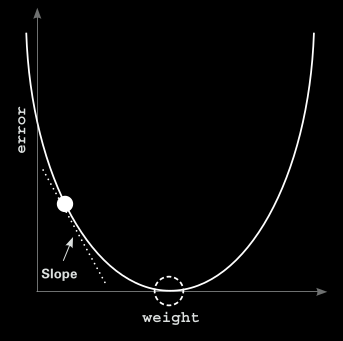

In [45]:
weight, goal_pred, input = (0.0, 0.8, 1.1)
for iteration in range(4):
    print("-----\nWeight:" + str(weight))
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * input
    weight = weight - weight_delta
    print("Error:" + str(error) + " Prediction:" + str(pred))
    print("Delta:" + str(delta) + " Weight Delta:" + str(weight_delta))

-----
Weight:0.0
Error:0.6400000000000001 Prediction:0.0
Delta:-0.8 Weight Delta:-0.8800000000000001
-----
Weight:0.8800000000000001
Error:0.02822400000000005 Prediction:0.9680000000000002
Delta:0.16800000000000015 Weight Delta:0.1848000000000002
-----
Weight:0.6951999999999999
Error:0.0012446784000000064 Prediction:0.76472
Delta:-0.03528000000000009 Weight Delta:-0.0388080000000001
-----
Weight:0.734008
Error:5.4890317439999896e-05 Prediction:0.8074088
Delta:0.007408799999999993 Weight Delta:0.008149679999999992


In [42]:
# overshoot twice in the above iteration

In [20]:
errors = []
weights = []
weight = 0.5
goal_pred = 0.8
input = 0.5
for iteration in range(40):
    weights.append(weight)
    pred = input * weight
    error = (pred - goal_pred) ** 2
    errors.append(error)
    direction_and_amount = (pred - goal_pred) * input
    weight = weight - direction_and_amount
    print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.30250000000000005 Prediction:0.25
Error:0.17015625000000004 Prediction:0.3875
Error:0.095712890625 Prediction:0.49062500000000003
Error:0.05383850097656251 Prediction:0.56796875
Error:0.03028415679931642 Prediction:0.6259765625
Error:0.0170348381996155 Prediction:0.669482421875
Error:0.00958209648728372 Prediction:0.70211181640625
Error:0.005389929274097089 Prediction:0.7265838623046875
Error:0.0030318352166796153 Prediction:0.7449378967285156
Error:0.0017054073093822882 Prediction:0.7587034225463867
Error:0.0009592916115275371 Prediction:0.76902756690979
Error:0.0005396015314842384 Prediction:0.7767706751823426
Error:0.000303525861459885 Prediction:0.7825780063867569
Error:0.00017073329707118678 Prediction:0.7869335047900676
Error:9.603747960254256e-05 Prediction:0.7902001285925507
Error:5.402108227642978e-05 Prediction:0.7926500964444131
Error:3.038685878049206e-05 Prediction:0.7944875723333098
Error:1.7092608064027242e-05 Prediction:0.7958656792499823
Error:9.614592036015323

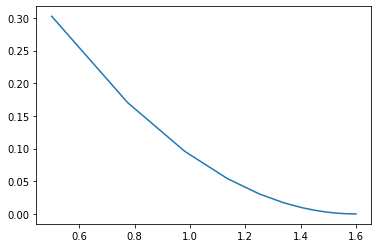

In [21]:
import matplotlib.pyplot as plt
plt.plot(weights, errors)

In [ ]:
# You can compute the slope (derivative)
# of the line for any value of weight. You can then
# use this slope (derivative) to figure out which
# direction reduces the error. Even better, based
# on the steepness, you can get at least some idea
# of how far away you are from the optimal point
# where the slope is zero

In [22]:
# error
# is a measure of how much you missed. The
# derivative defines the relationship between each
# weight and how much you missed. In other
# words, it tells how much changing a weight
# contributed to the error.

In [23]:
weight = 0.0
goal_pred = 0.8
input = 1.1
for iteration in range(4):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * input # derivative - how fast the error changes, 
                                   # given changes in the weight
    weight = weight - weight_delta
    print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.6400000000000001 Prediction:0.0
Error:0.02822400000000005 Prediction:0.9680000000000002
Error:0.0012446784000000064 Prediction:0.76472
Error:5.4890317439999896e-05 Prediction:0.8074088


In [38]:
def iterate(weight=0.5, goal_pres=0.8, input=0.5, rounds=20):
    weights = []
    errors = []
    for iteration in range(rounds):
        weights.append(weight)
        pred = input * weight
        error = (pred - goal_pred) ** 2
        errors.append(error)
        delta = pred - goal_pred
        weight_delta = input * delta
        weight = weight - weight_delta
        print("Error:" + str(error) + " Prediction:" + str(pred))
    return weights, errors

In [39]:
weights, errors = iterate()

Error:0.30250000000000005 Prediction:0.25
Error:0.17015625000000004 Prediction:0.3875
Error:0.095712890625 Prediction:0.49062500000000003
Error:0.05383850097656251 Prediction:0.56796875
Error:0.03028415679931642 Prediction:0.6259765625
Error:0.0170348381996155 Prediction:0.669482421875
Error:0.00958209648728372 Prediction:0.70211181640625
Error:0.005389929274097089 Prediction:0.7265838623046875
Error:0.0030318352166796153 Prediction:0.7449378967285156
Error:0.0017054073093822882 Prediction:0.7587034225463867
Error:0.0009592916115275371 Prediction:0.76902756690979
Error:0.0005396015314842384 Prediction:0.7767706751823426
Error:0.000303525861459885 Prediction:0.7825780063867569
Error:0.00017073329707118678 Prediction:0.7869335047900676
Error:9.603747960254256e-05 Prediction:0.7902001285925507
Error:5.402108227642978e-05 Prediction:0.7926500964444131
Error:3.038685878049206e-05 Prediction:0.7944875723333098
Error:1.7092608064027242e-05 Prediction:0.7958656792499823
Error:9.614592036015323

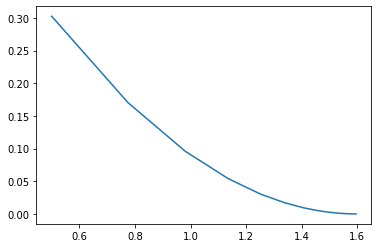

In [43]:
plt.plot(weights, errors)

In [45]:
weights, errors = iterate(input=2)

Error:0.03999999999999998 Prediction:1.0
Error:0.3599999999999998 Prediction:0.20000000000000018
Error:3.2399999999999984 Prediction:2.5999999999999996
Error:29.159999999999986 Prediction:-4.599999999999999
Error:262.4399999999999 Prediction:16.999999999999996
Error:2361.959999999998 Prediction:-47.79999999999998
Error:21257.639999999978 Prediction:146.59999999999994
Error:191318.75999999983 Prediction:-436.5999999999998
Error:1721868.839999999 Prediction:1312.9999999999995
Error:15496819.559999991 Prediction:-3935.799999999999
Error:139471376.03999993 Prediction:11810.599999999997
Error:1255242384.3599997 Prediction:-35428.59999999999
Error:11297181459.239996 Prediction:106288.99999999999
Error:101674633133.15994 Prediction:-318863.79999999993
Error:915071698198.4395 Prediction:956594.5999999997
Error:8235645283785.954 Prediction:-2869780.599999999
Error:74120807554073.56 Prediction:8609344.999999996
Error:667087267986662.1 Prediction:-25828031.799999986
Error:6003785411879960.0 Predi

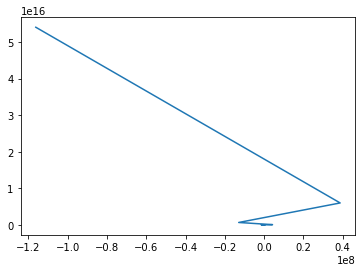

In [46]:
plt.plot(weights, errors)

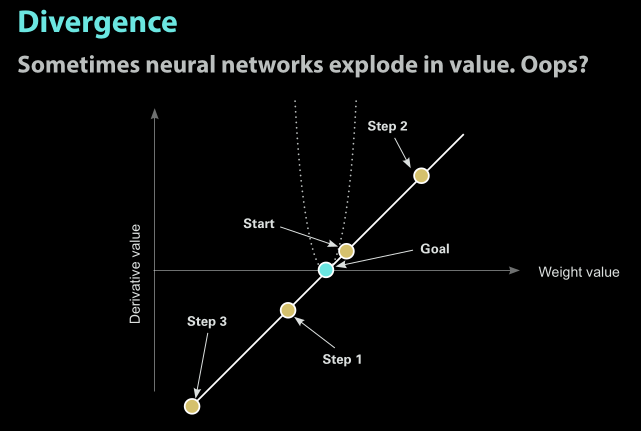

In [62]:
weight=0.5
goal_pres=0.8
input=2
alpha = 0.1

weights = []
errors = []
for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    weights.append(weight)
    errors.append(errors)
    derivative = input * (pred - goal_pred)
    weight = weight - (alpha * derivative)
    print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.03999999999999998 Prediction:1.0
Error:0.0144 Prediction:0.92
Error:0.005183999999999993 Prediction:0.872
Error:0.0018662400000000014 Prediction:0.8432000000000001
Error:0.0006718464000000028 Prediction:0.8259200000000001
Error:0.00024186470400000033 Prediction:0.815552
Error:8.70712934399997e-05 Prediction:0.8093312
Error:3.134566563839939e-05 Prediction:0.80559872
Error:1.1284439629823931e-05 Prediction:0.803359232
Error:4.062398266736526e-06 Prediction:0.8020155392
Error:1.4624633760252567e-06 Prediction:0.8012093235200001
Error:5.264868153690924e-07 Prediction:0.8007255941120001
Error:1.8953525353291194e-07 Prediction:0.8004353564672001
Error:6.82326912718715e-08 Prediction:0.8002612138803201
Error:2.456376885786678e-08 Prediction:0.8001567283281921
Error:8.842956788836216e-09 Prediction:0.8000940369969153
Error:3.1834644439835434e-09 Prediction:0.8000564221981492
Error:1.1460471998340758e-09 Prediction:0.8000338533188895
Error:4.125769919393652e-10 Prediction:0.80002031199

In [ ]:
plt.plot(weights, errors)